<a href="https://colab.research.google.com/github/Deeksha-M910/ML_Project/blob/main/Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name : Netflix Movies and TV Shows Clustering**
# Project Type: Unsupervised ML
# Batch: Cohort Seoul
# Name: Deeksha More N

# **Problem Statement**

 The problem statement revolves around improving the Netflix experience for users by understanding their preferences and viewing habits. By analyzing data on what users watch and how they interact with the platform, the goal is to enhance Netflix's recommendation algorithms. This can lead to better personalized recommendations, ultimately increasing user satisfaction and engagement with the platform.

# Project summary

**With more than 83 million subscribers and presence in more than 190 countries, Netflix is the most popular Internet television network in the world. Its users watch more than 125 million hours of TV and movie content daily, including original series, documentaries, and feature films. On almost any screen that is linked to the Internet, members can watch as much as they want, whenever and wherever. Without interruptions or obligations, members can play, pause, and resume watching at any time.**

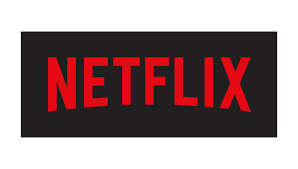

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link :**

Deeksha More N - https://github.com/Deeksha-M910/ML_Project

#  **Business Objective** : Netflix's business objectives for clustering movies and TV shows are closely aligned with enhancing the user experience, optimizing content selection and promotion, and ultimately retaining subscribers in a competitive streaming landscape. Clustering serves as a powerful tool in achieving these objectives and maintaining Netflix's position as a leader in the streaming industry than other to make more profit .

## <b>Task
 <br>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>6) Applying Different Clustering Algorithms

<b><u>Clustering</b></u>: -<br>
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

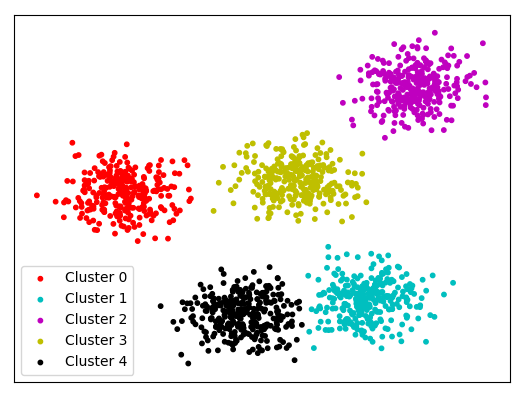

## <b>Five*(5)* Clustering algo I have used
* ### <b>1. Silhouette score
* ### <b> 2. Elbow Method
* ### <b>3. DBSCAN
* ### <b>4. Dendrogram
* ### <b> 5. AgglomerativeClustering

### <b>6.1 Silhouette score

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [ ]:
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7777.000000,7777.000000,7777.000000
mean,2.192491,93.010930,24.328019
std,0.786070,10.773339,10.685483
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [ ]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4282097956620796
For n_clusters = 3, silhouette score is 0.38328727950899033
For n_clusters = 4, silhouette score is 0.3742864231776496
For n_clusters = 5, silhouette score is 0.37214622759316657
For n_clusters = 6, silhouette score is 0.36721240475298544
For n_clusters = 7, silhouette score is 0.3761017664372147
For n_clusters = 8, silhouette score is 0.3702896410850471
For n_clusters = 9, silhouette score is 0.374628676710254
For n_clusters = 10, silhouette score is 0.36503368915157364
For n_clusters = 11, silhouette score is 0.35523831591433047
For n_clusters = 12, silhouette score is 0.3537956430748188
For n_clusters = 13, silhouette score is 0.3522776175958325
For n_clusters = 14, silhouette score is 0.3433760423014296
For n_clusters = 15, silhouette score is 0.3266831307655065


In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
5,7,0.376
7,9,0.375
2,4,0.374
3,5,0.372
6,8,0.370
4,6,0.367
8,10,0.365
9,11,0.355


* <b>NOTE :-</b><br>
The value of the silhouette coefﬁcient is between [-1, 1]. **A score of 1 denotes the best meaning that the data point i is very compact within the cluster** to which it belongs and far away from the other clusters. *The worst value is -1*. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.4282097956620796
For n_clusters = 3 The average silhouette_score is : 0.38328727950899033
For n_clusters = 4 The average silhouette_score is : 0.3742864231776496
For n_clusters = 5 The average silhouette_score is : 0.37213696566861343
For n_clusters = 6 The average silhouette_score is : 0.36739020688073004
For n_clusters = 7 The average silhouette_score is : 0.3529487490018773
For n_clusters = 8 The average silhouette_score is : 0.3686065382419988
For n_clusters = 9 The average silhouette_score is : 0.37375194836841297
For n_clusters = 10 The average silhouette_score is : 0.3625549419350084
For n_clusters = 11 The average silhouette_score is : 0.354594165755349
For n_clusters = 12 The average silhouette_score is : 0.350520497006649
For n_clusters = 13 The average silhouette_score is : 0.3550905676347843
For n_clusters = 14 The average silhouette_score is : 0.3339220575739693
For n_clusters = 15 The average silhouette_score is : 0.3

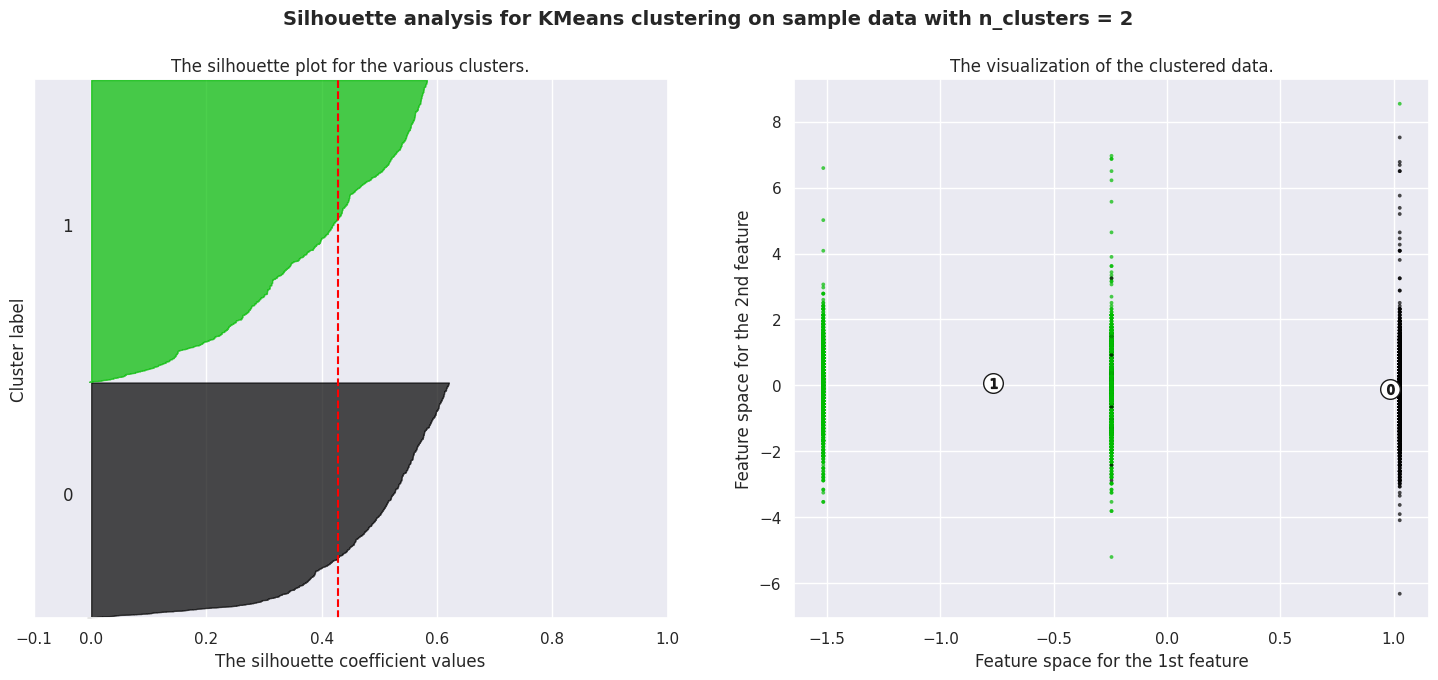

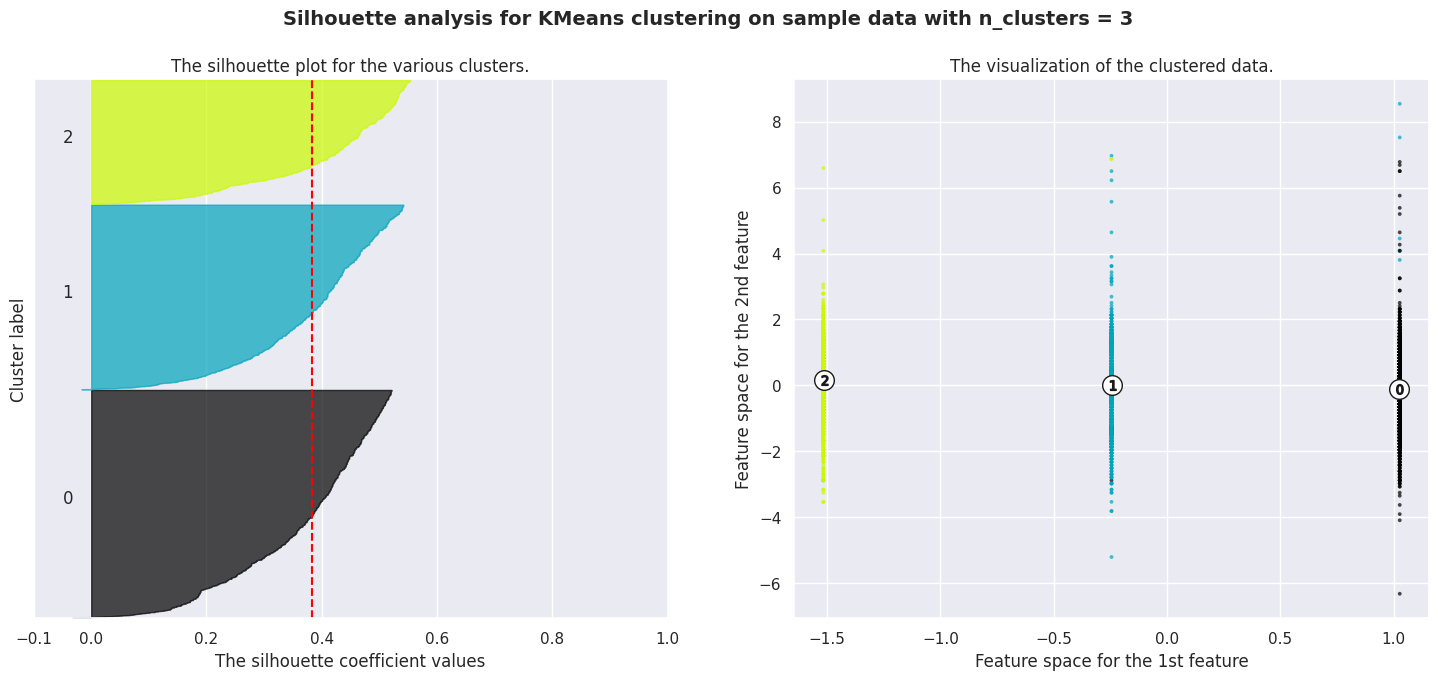

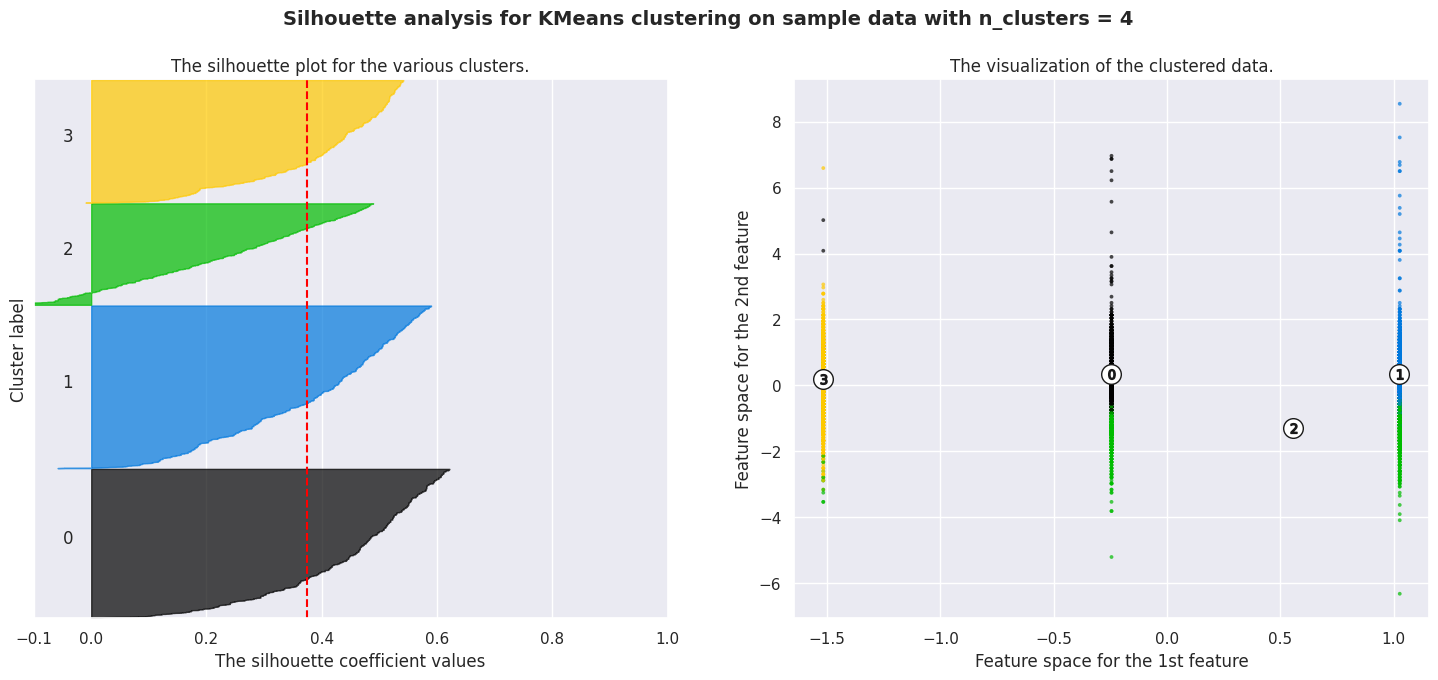

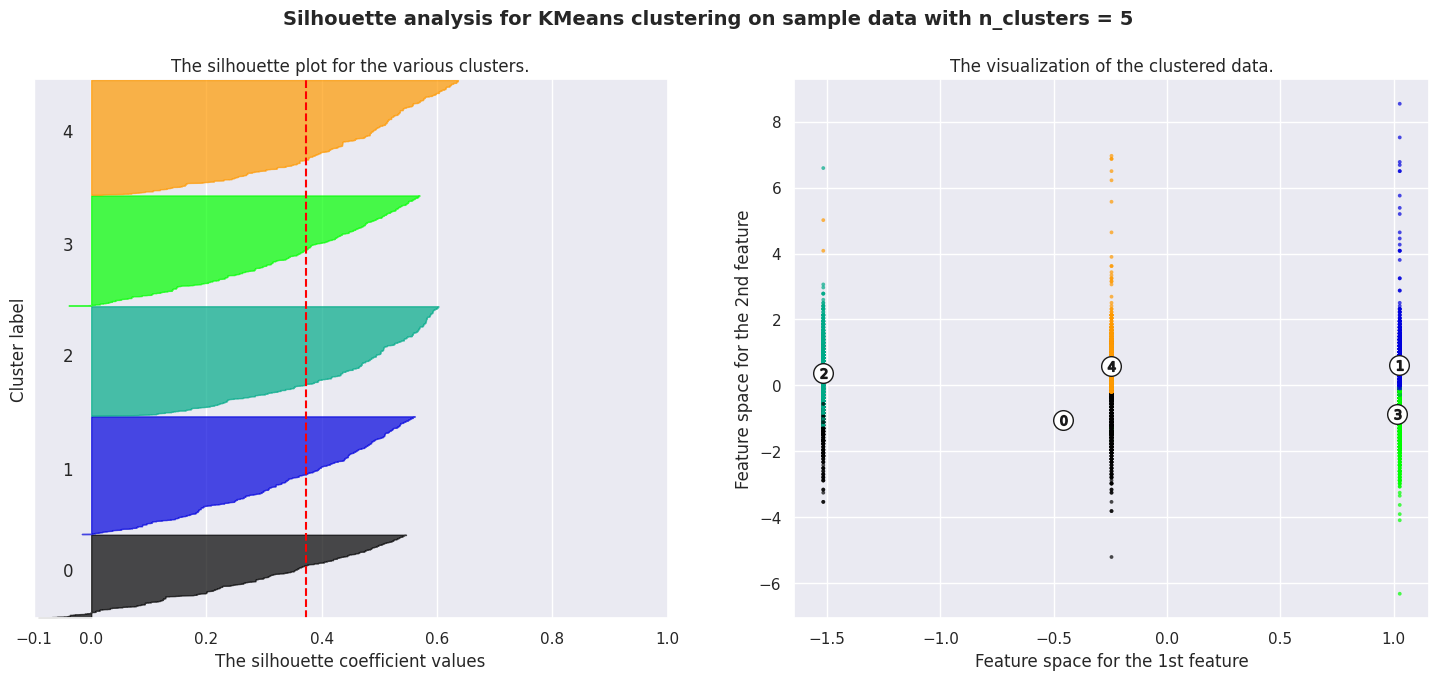

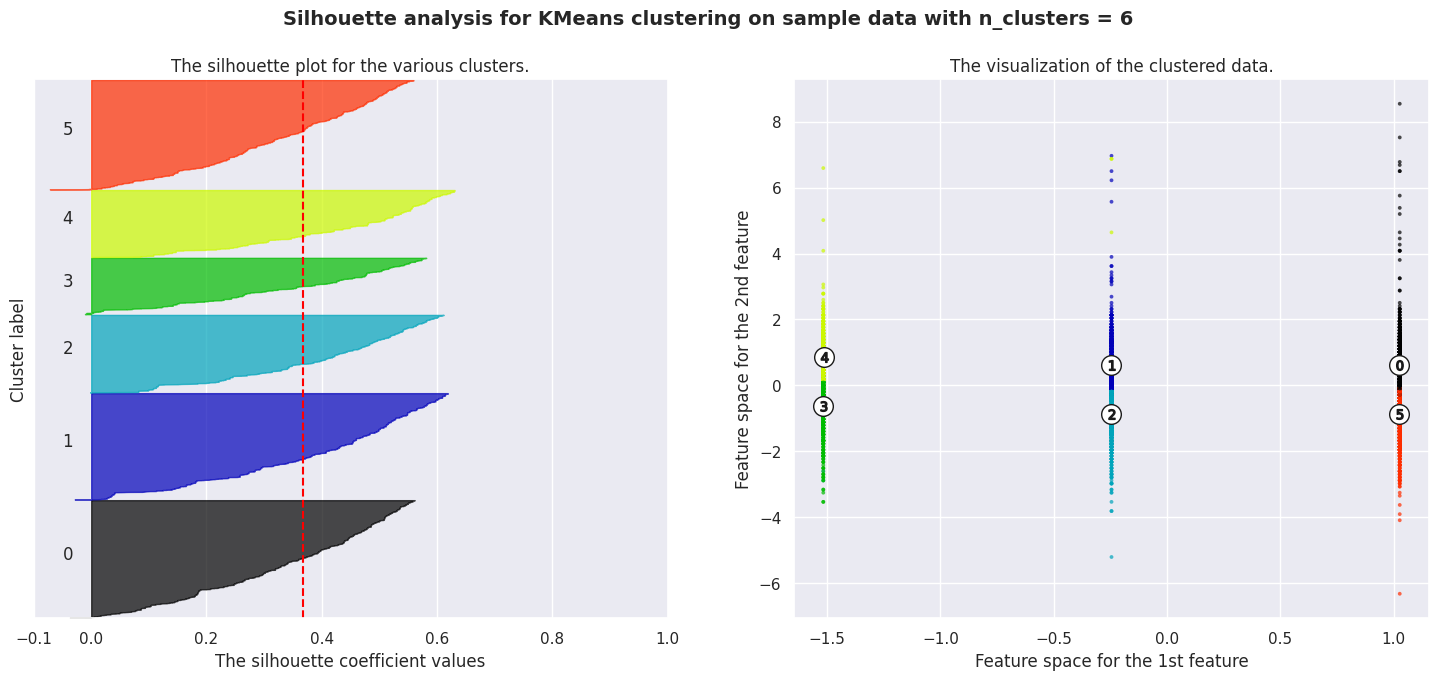

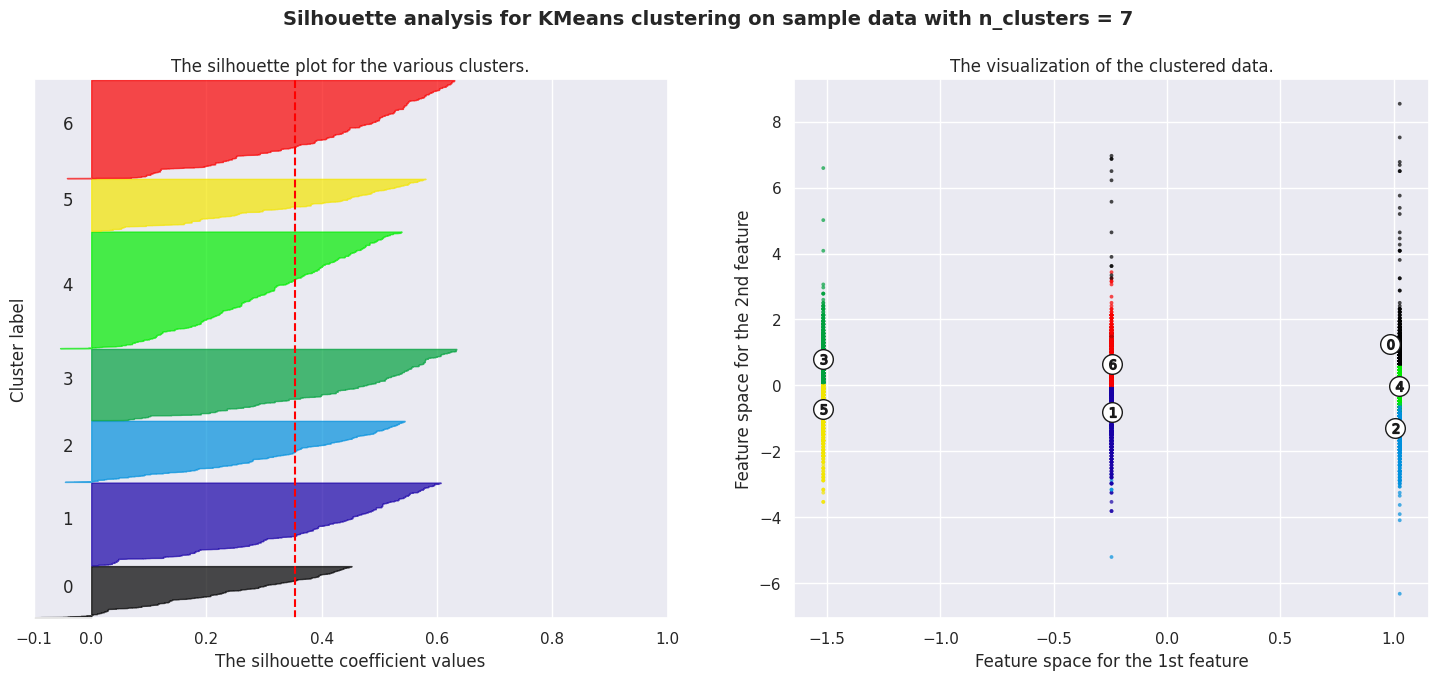

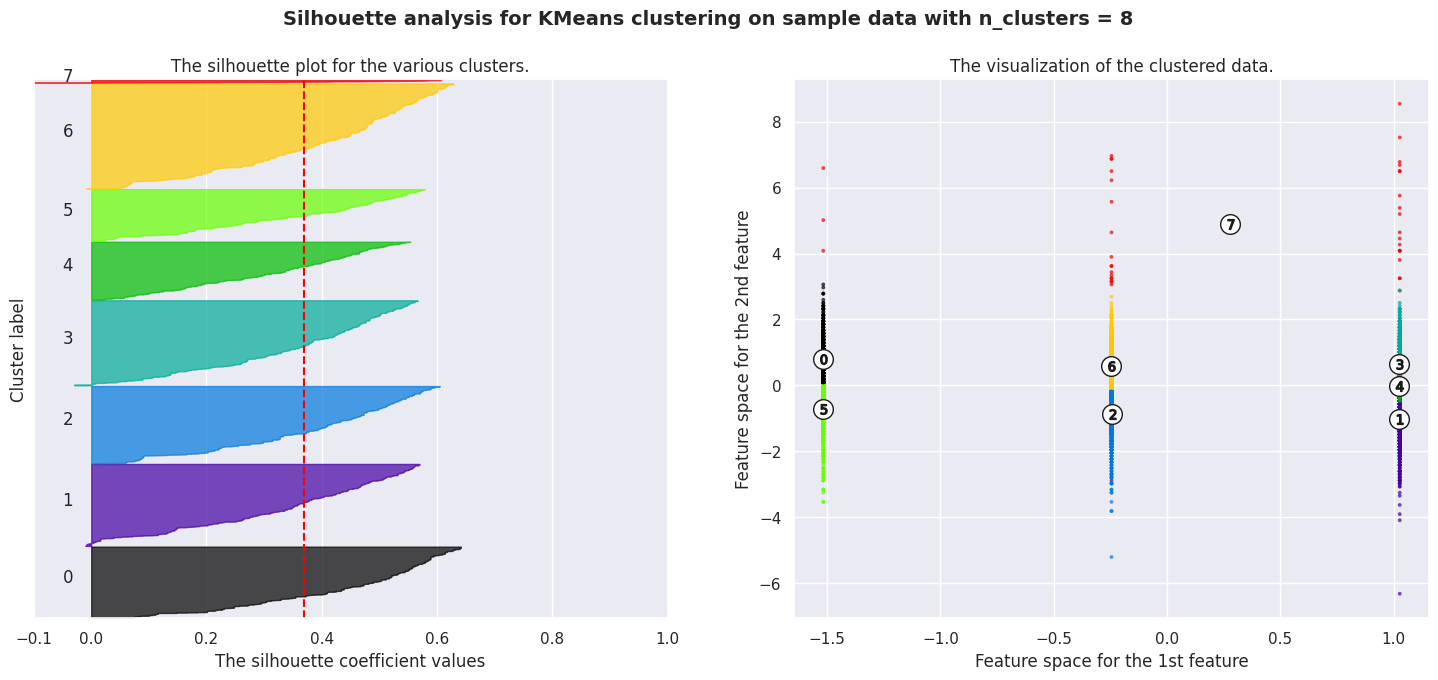

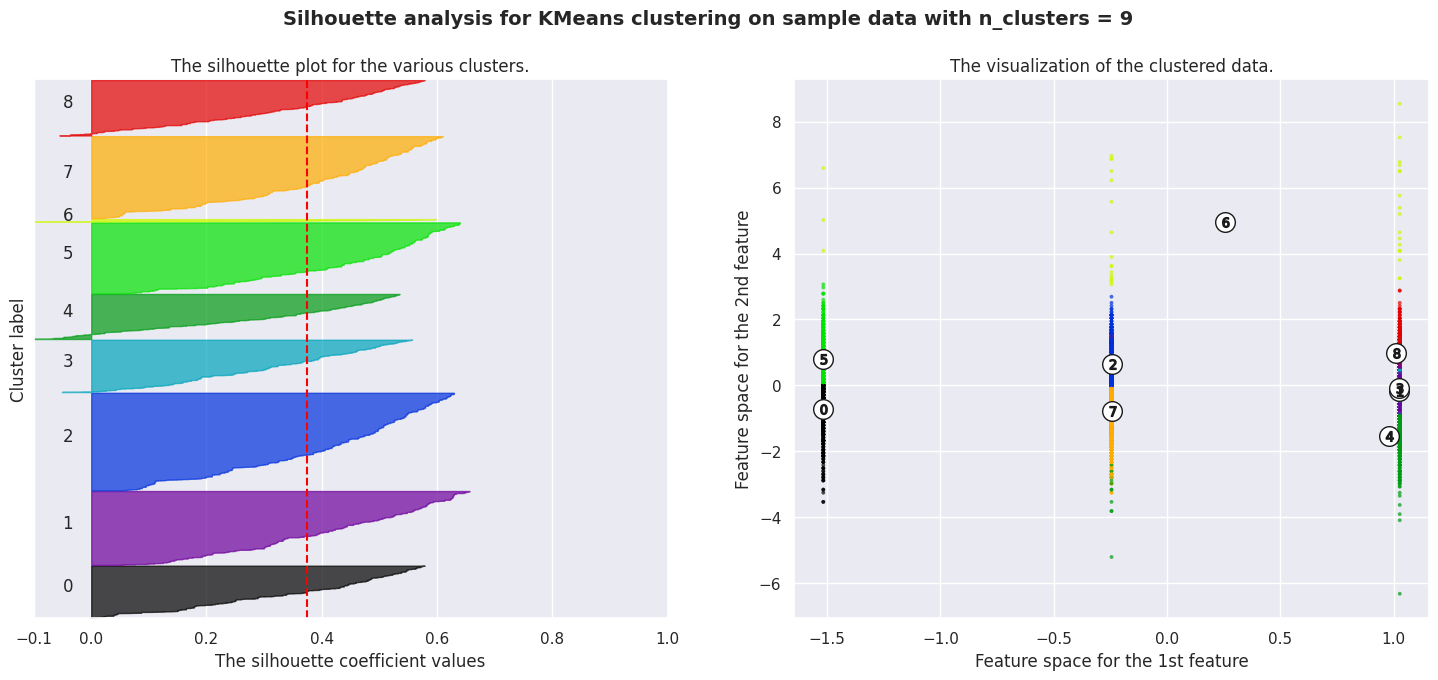

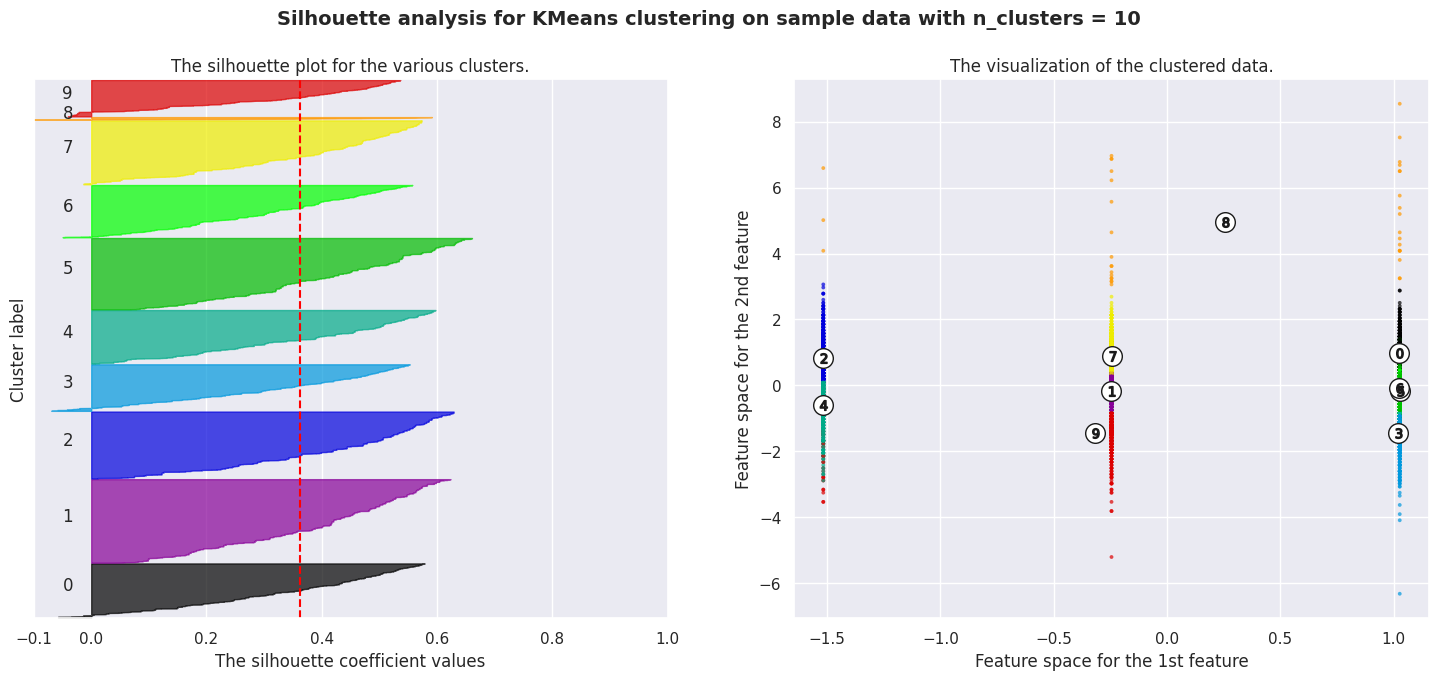

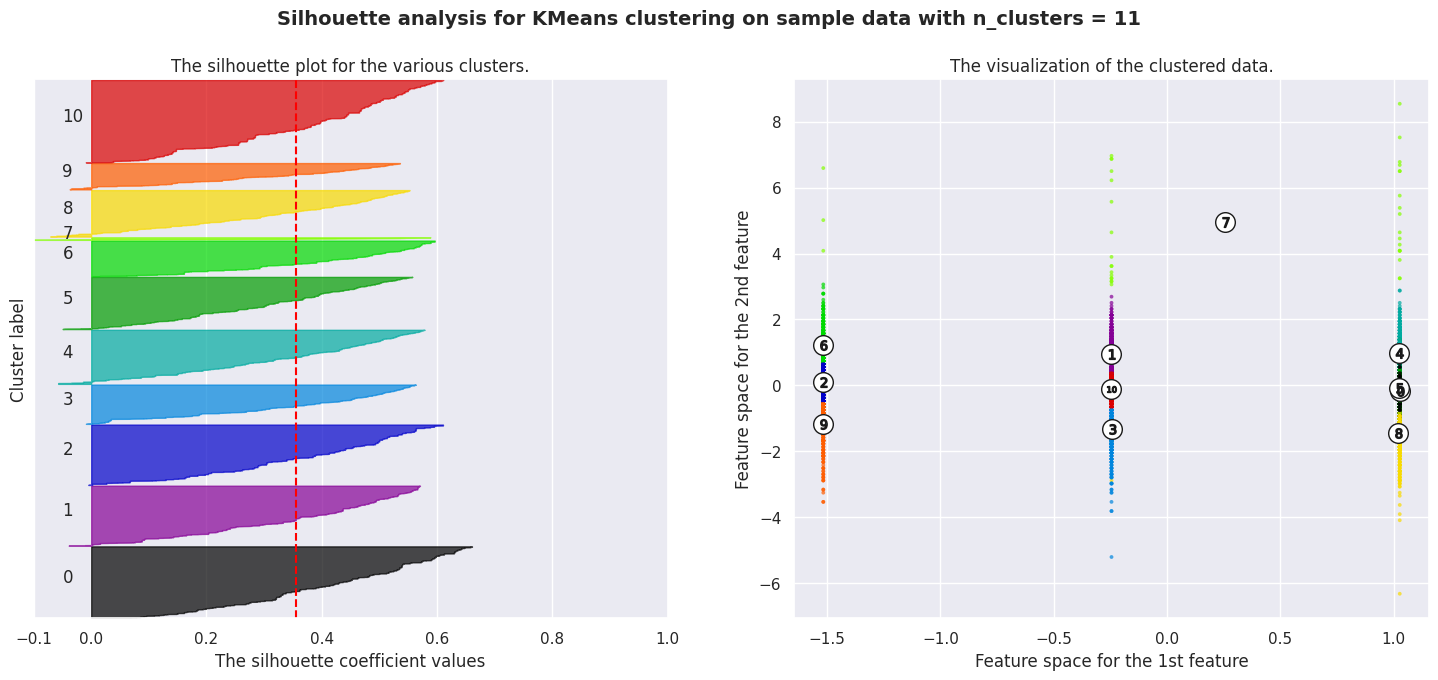

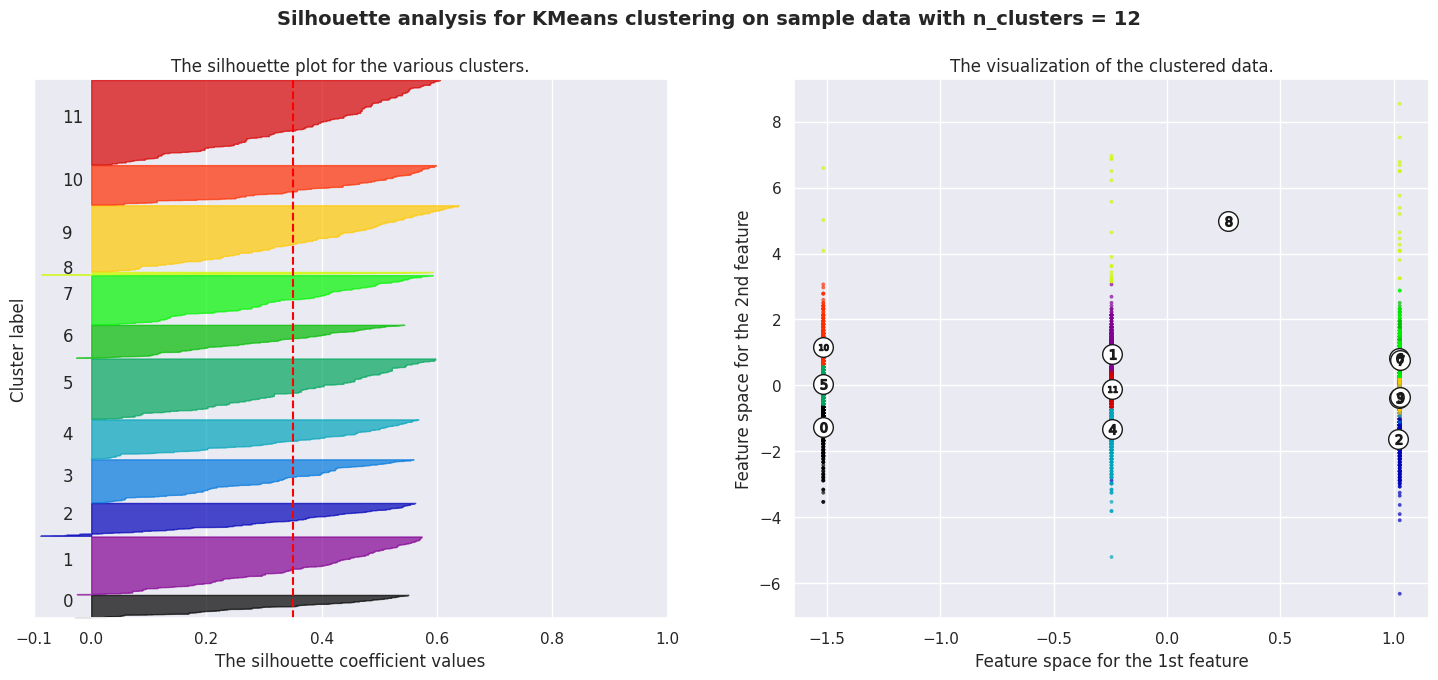

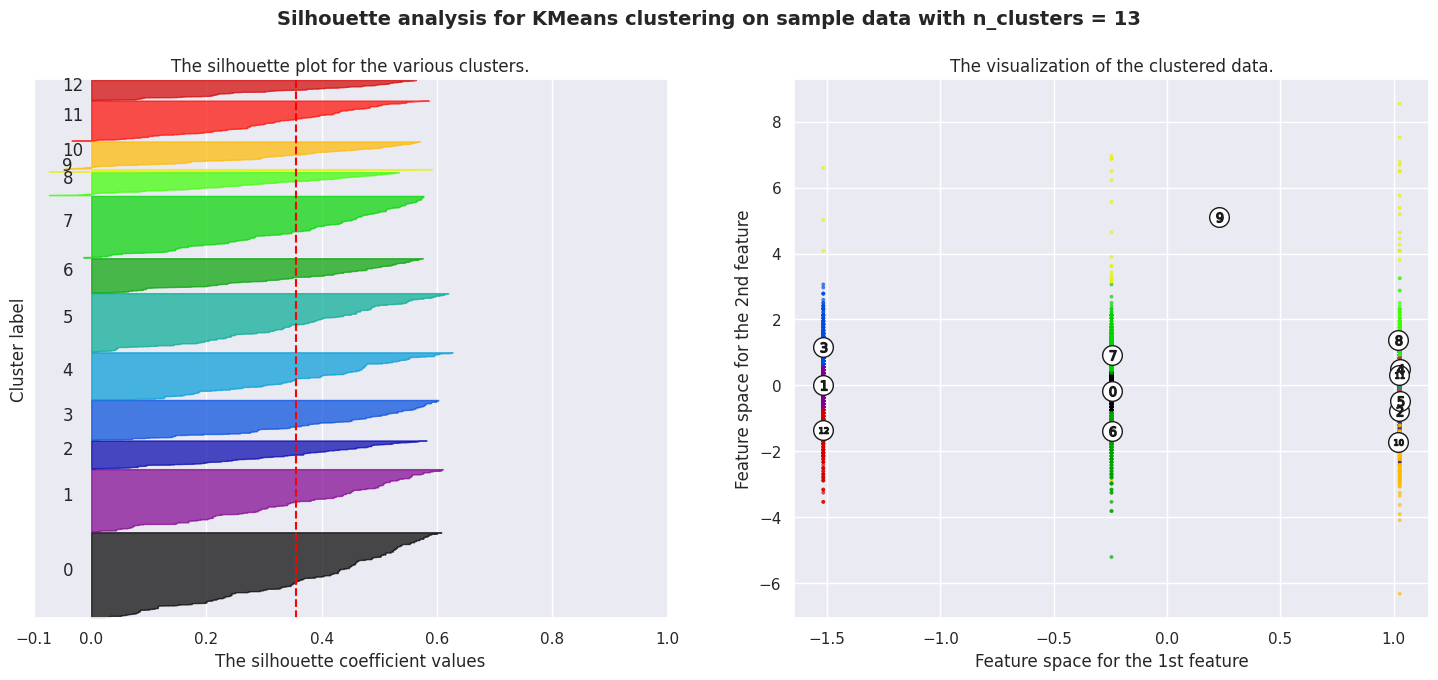

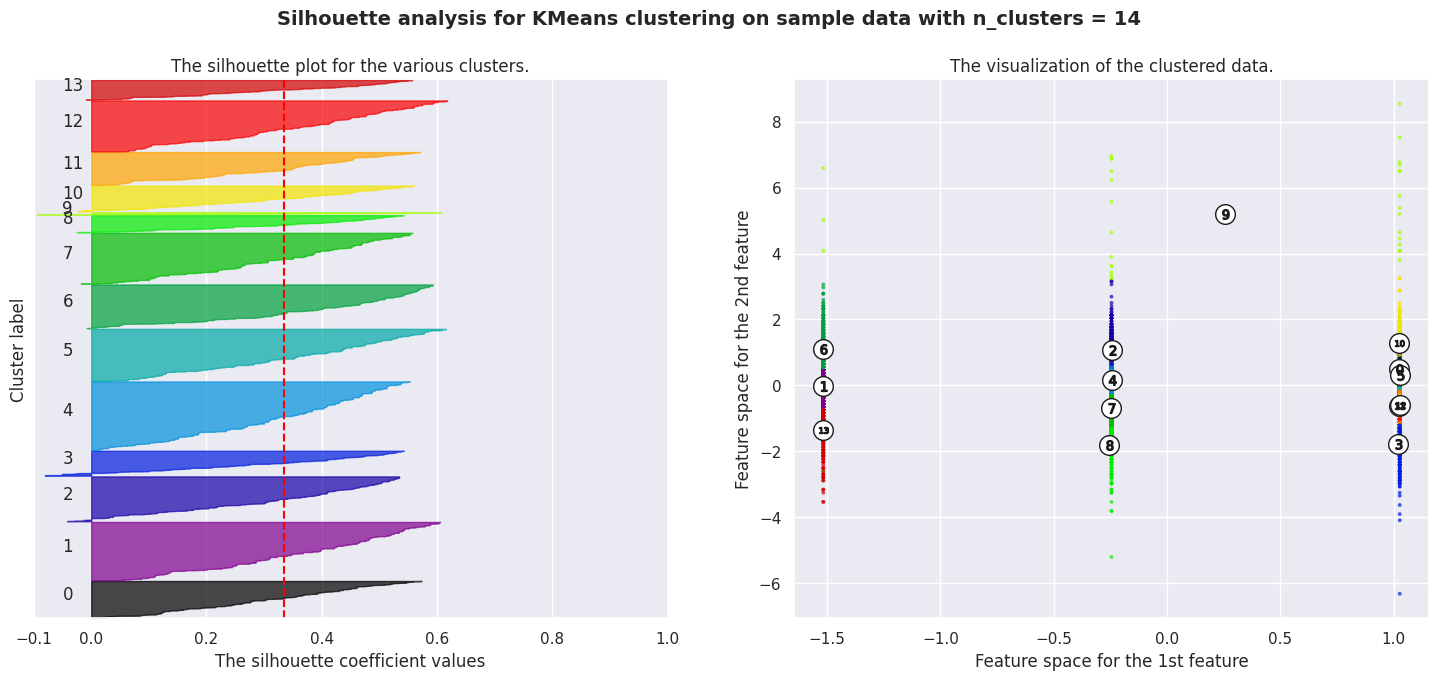

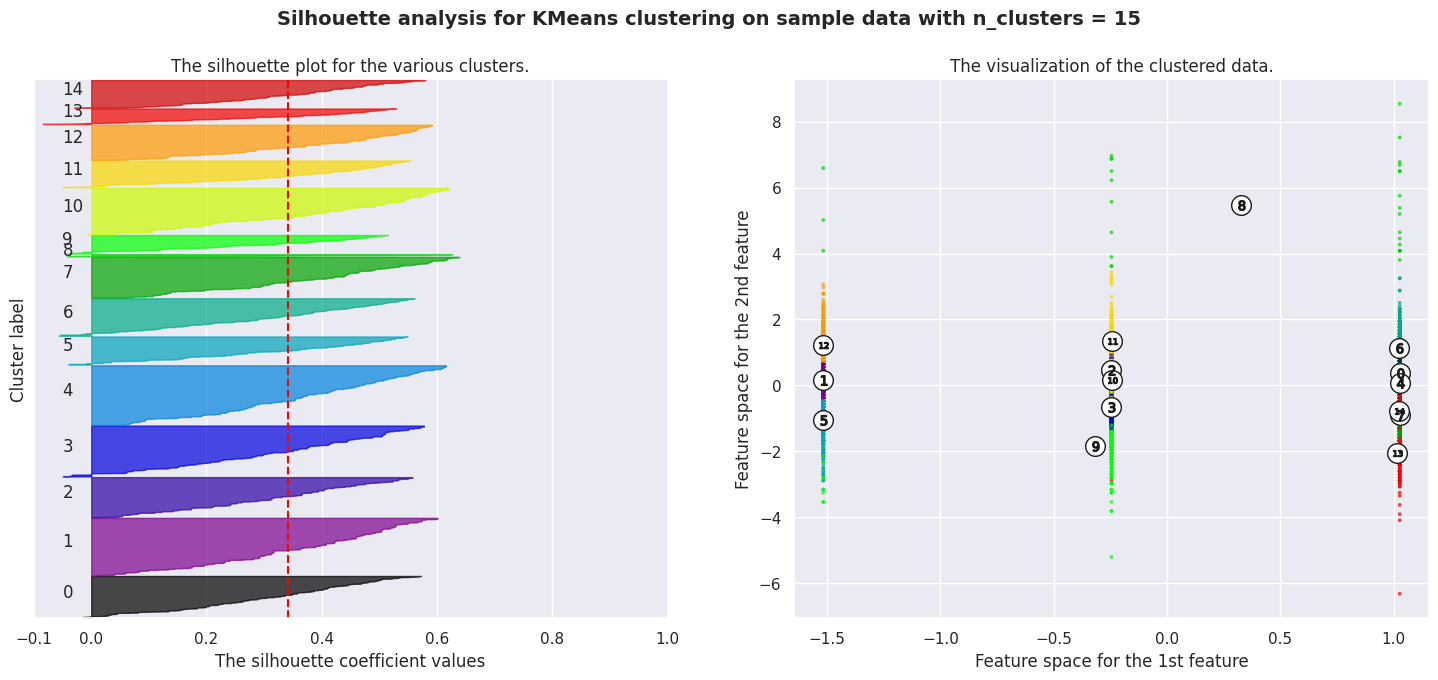

In [ ]:

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:<br>
* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
<br>
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

<br>The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

### <b> 6.2 Elbow Method

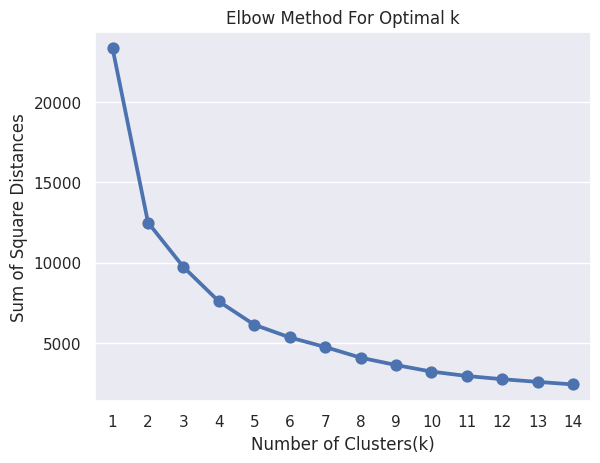

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We will be using **3 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

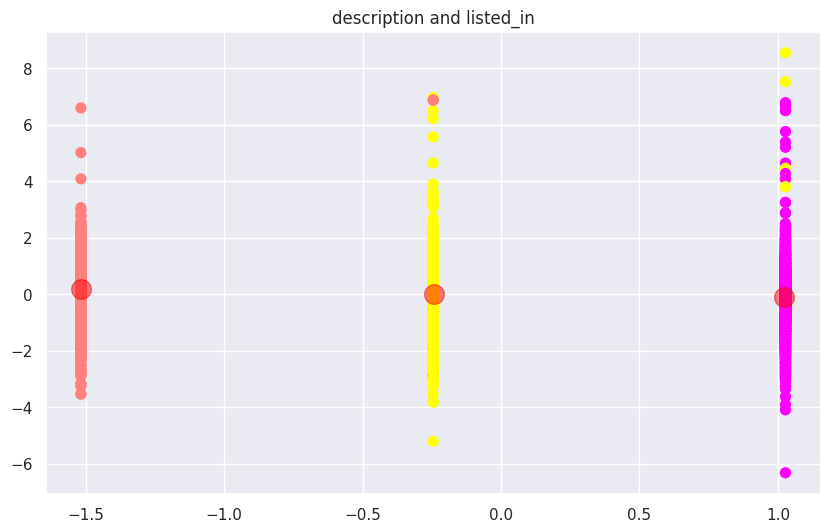

In [ ]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### <b>6.3 DBSCAN

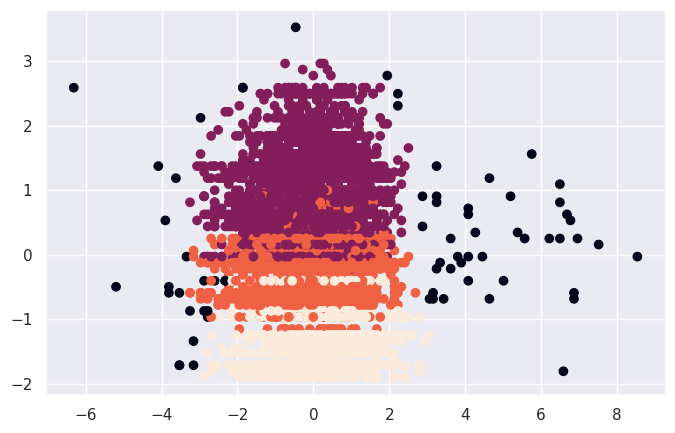

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

The black colour dots(*) are noise

### <b> 6.4 Dendrogram

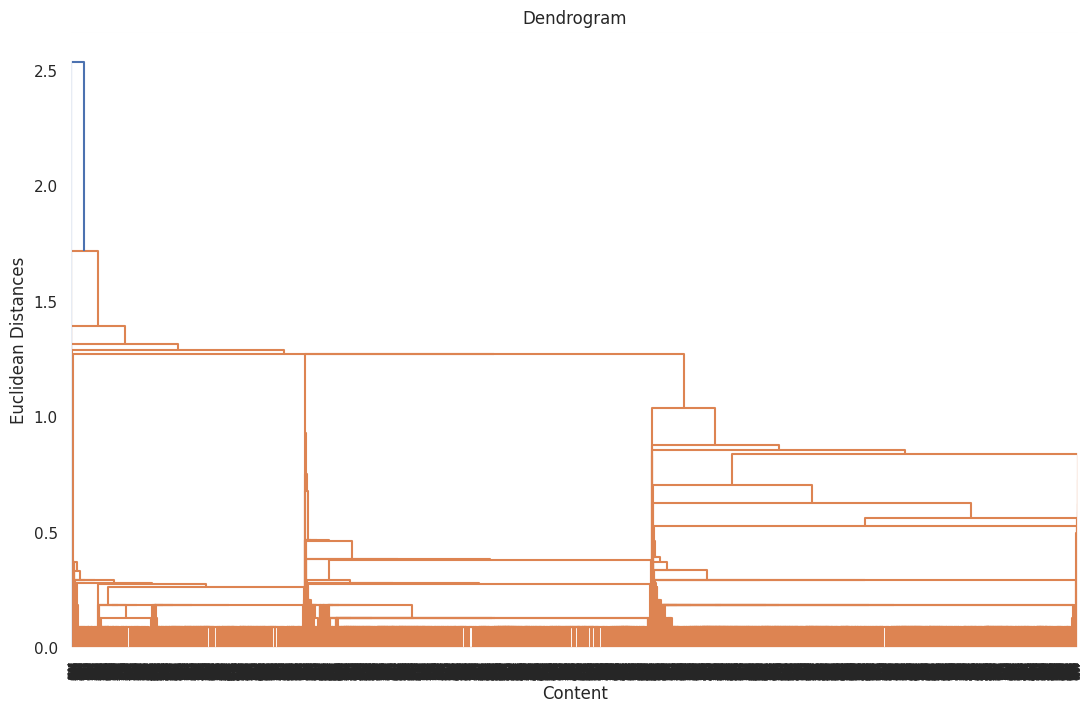

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold**

**No. of the Cluster = 3**

### <b> 6.5 AgglomerativeClustering

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

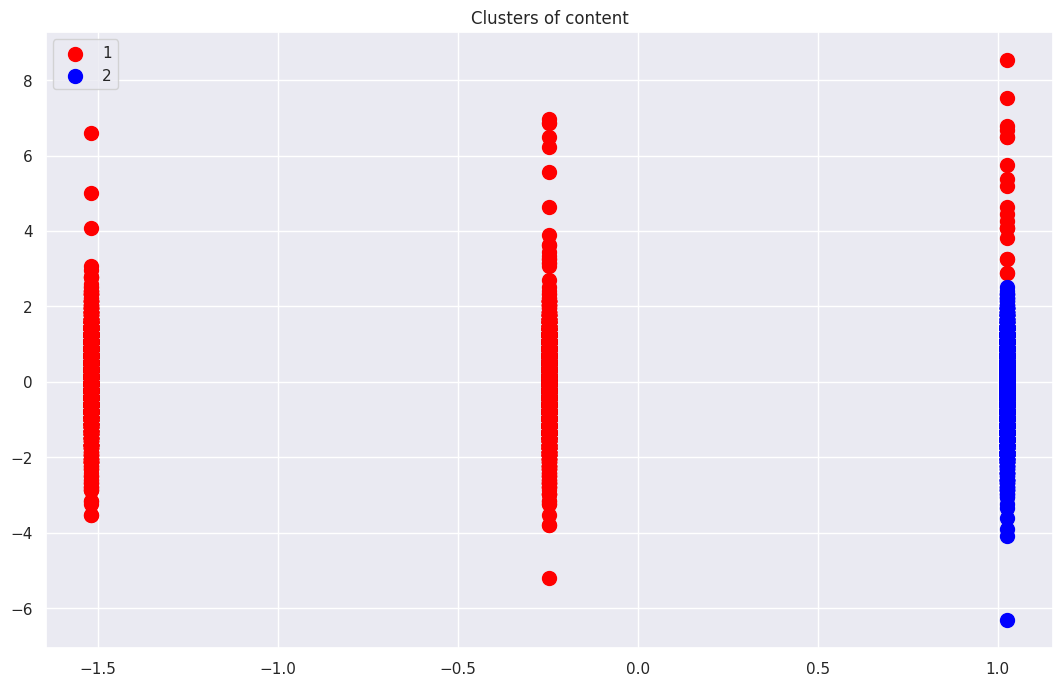

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

# We Can Use Topic Modelling In Netflix_Movies_And_Tv_Shows_Clustering


##Exploratory Data Analysis Conclusions
---
---
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**
---
> * **There are almost twice as many movies as TV shows on Netflix.**
---
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**
---
> **Top Countries in Netflix are:**
1. **United States**
2. **India**
3. **United Kingdom**
4. **Canada**
5. **France**

---
> **Top Genres in Netflix are:**
1. **Drama**
2.**Comedy**
3.**Documentary**
4.**Action and Adventure**
5.**Romance**

---
> **Top Directors on Netflix are:**
1. **Jan Suter**
2.**Raul Campos**
3.**Marcus Raboy**
4.**Jay Karas**
5.**Cathy Garcia-Molina**

---
> **Top Actors on Netflix are:**
1. **Anupam Kher**
2.**Shah Rukh Khan**
3.**Naseeruddin Shah**
4.**Om Puri**
5.**Akshay Kumar**

---
> * **Most movies on Netflix have a duration range from 90 to 110 minutes**
---
> * **Most TV shows on Netflix have a span of only one season**.
---

## <font size='+2' color = 'white'> <B> End Conclusion.</b>

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.
10.By applying different clustering algorithms to our dataset we get the optimal number of
cluster is equal to 3.